In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [52]:
cancer=pd.read_csv('BreastCancer.csv', index_col=0)
lbl= LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
X= cancer.drop('Class',axis=1)
y= cancer['Class']
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0


In [53]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [54]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

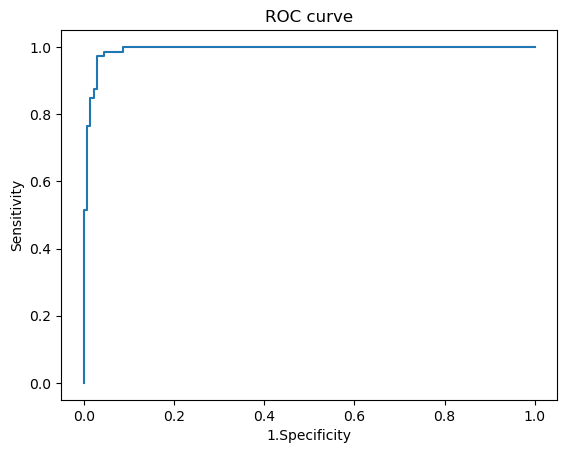

In [55]:
y_pred_prob= lr.predict_proba(X_test)[:,1]

fpr,tpr,thres= roc_curve(y_test,y_pred_prob)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.ylabel('Sensitivity')
plt.xlabel('1.Specificity')
plt.show()

In [56]:
#AUC

print(roc_auc_score(y_test,y_pred_prob))

0.9917471819645732


### ************** GRID Search CV **************

In [57]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [58]:
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
lr= LogisticRegression()

params={'penalty':['l1','l2','elasticnet',None],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
gcv= GridSearchCV(lr,param_grid=params,cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:35

{'penalty': 'l1', 'solver': 'liblinear'}
0.962764645426516


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:35

### ************************************************************************************************************

In [59]:
boston=pd.read_csv('Boston.csv')
X= boston.drop('medv',axis=1)
y=boston['medv']

In [60]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=23)

In [61]:
elastic= ElasticNet()
elastic.fit(X_train, y_train)
y_pred=elastic.predict(X_test)
print(r2_score(y_test, y_pred))

0.6588026707693808


In [62]:
from sklearn.model_selection import GridSearchCV,KFold

In [98]:
kfold= KFold(n_splits=5, shuffle=True,random_state=23)
l1_rat= np.linspace(0.001,0.999,20)
alphas = np.linspace(0.001,4,20)
params={'alpha':alphas,'l1_ratio':l1_rat}
gcv= GridSearchCV(ElasticNet(),param_grid=params,cv=kfold,scoring='r2')
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 2.11473684e-01, 4.21947368e-01, 6.32421053e-01,
       8.42894737e-01, 1.05336842e+00, 1.26384211e+00, 1.47431579e+00,
       1.68478947e+00, 1.89526316e+00, 2.10573684e+00, 2.31621053e+00,
       2.52668421e+00, 2.73715789e+00, 2.94763158e+00, 3.15810526e+00,
       3.36857895e+00, 3.57905263e+00, 3.78952632e+00, 4.00000000e+00]),
                         'l1_ratio': array([0.001     , 0.05352632, 0.10605263, 0.15857895, 0.21110526,
       0.26363158, 0.31615789, 0.36868421, 0.42121053, 0.47373684,
       0.52626316, 0.57878947, 0.63131579, 0.68384211, 0.73636842,
       0.78889474, 0.84142105, 0.89394737, 0.94647368, 0.999     ])},
             scoring='r2')

In [99]:
print(gcv.best_params_)

{'alpha': 4.0, 'l1_ratio': 0.001}


In [100]:
print(gcv.best_score_)

0.6380121023389203


### ************************************************************************************************************************

In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.metrics import log_loss,accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [142]:
mowers = pd.read_csv('RidingMowers.csv')
lbl= LabelEncoder()
mowers['Response']=lbl.fit_transform(mowers['Response'])

In [143]:
X= mowers.drop('Response',axis=1)
y=mowers['Response']
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [144]:
km= KNeighborsClassifier(n_neighbors=1)
km.fit(X_train,y_train)
y_pred=km.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8518518518518519


In [145]:
y_pred_prob=km.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_pred_prob))

5.33980050209143


In [146]:
from sklearn.model_selection import StratifiedGroupKFold,GridSearchCV

kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
knm= KNeighborsClassifier()

params={'n_neighbors':np.arange(1,11)}



In [147]:
#log loss

gcv= GridSearchCV(knm,param_grid=params, cv=kfold, scoring='neg_log_loss')

In [148]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_log_loss')

In [149]:
gcv.best_params_

{'n_neighbors': 8}

In [150]:
gcv.best_score_

-1.1403137133213659

### *****************************************************************************************

In [151]:
img= pd.read_csv('Image_Segmention.csv')
lbl= LabelEncoder()
img['Class']=lbl.fit_transform(img['Class'])
print(lbl.classes_)


['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']


In [152]:
X=img.drop('Class',axis=1)
y= img['Class']

In [153]:
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
knn= KNeighborsClassifier()

In [154]:
params= {'n_neighbors':np.arange(1,11)}

In [155]:
#log loss
gcv= GridSearchCV(knm,param_grid=params, cv=kfold, scoring='neg_log_loss')

In [156]:
gcv.fit(X,y)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    # If `_MultimetricScorer` raises exception, the `error_score`
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_log_loss')

In [160]:
gcv.best_params_

{'n_neighbors': 1}

In [159]:
gcv.best_score_

nan